In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%load_ext autoreload

file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder that should be the extracted zip folder 
dataset = pd.read_csv(file)  # load the data and drop the first row that was filled with nans
features = ['Age', 'Gender', 'Increased Urination', 'Increased Thirst','Sudden Weight Loss',
                       'Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability',
                       'Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Diagnosis','Family History']

random.seed(149) #our random seed
dataset.head(10) #visualise file

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0
5,72,Male,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative,0
6,43,Male,No,No,No,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,No,Negative,1
7,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,Positive,0
8,37,Male,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,Positive,1
9,56,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Positive,1


In [2]:
dataset = dataset.interpolate()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  565 non-null    int64 
 1   Gender               565 non-null    object
 2   Increased Urination  565 non-null    object
 3   Increased Thirst     545 non-null    object
 4   Sudden Weight Loss   556 non-null    object
 5   Weakness             565 non-null    object
 6   Increased Hunger     552 non-null    object
 7   Genital Thrush       551 non-null    object
 8   Visual Blurring      565 non-null    object
 9   Itching              554 non-null    object
 10  Irritability         565 non-null    object
 11  Delayed Healing      565 non-null    object
 12  Partial Paresis      565 non-null    object
 13  Muscle Stiffness     550 non-null    object
 14  Hair Loss            565 non-null    object
 15  Obesity              565 non-null    object
 16  Diagnosi

In [3]:
def make_data_binary(data):
    binary = data.copy()
    ''' 
    We have changed the values from string to the binary ones, it will be easier for us 
    to work with the data.
    Female = 0, Male = 1.
    Yes = 1, No = 0
    Positive = 1, Negative = 0
    '''
    binary = binary.replace('Female',0).replace('Male',1).replace('No',0).replace('Yes',1).replace('Positive',1).replace('Negative',0)
    return binary.replace(np.nan, np.random.choice([0,1])) #we see in the data we have nan values. We have dropped them.

data = make_data_binary(dataset)
diag_state = data[["Diagnosis"]]
data.head(10) #visualize data after binarization

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,1,0,0.0,0.0,1,0.0,0.0,0,1.0,0,0,1,0.0,1,0,0,0
1,42,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,1,0,0,0
2,45,1,1,1.0,0.0,1,0.0,1.0,0,0.0,0,1,0,0.0,1,0,1,0
3,59,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,0,0,1,1
4,40,0,1,1.0,1.0,1,0.0,0.0,1,1.0,0,0,1,1.0,0,0,1,0
5,72,1,1,0.0,0.0,0,1.0,0.0,1,1.0,0,1,1,1.0,1,0,0,0
6,43,1,0,0.0,0.0,1,0.0,1.0,0,1.0,0,1,0,0.0,1,0,0,1
7,57,1,1,1.0,1.0,1,1.0,0.0,1,0.0,0,0,1,0.0,0,0,1,0
8,37,1,0,0.0,0.0,1,0.0,0.0,0,0.0,0,1,0,0.0,1,0,1,1
9,56,1,1,0.0,1.0,1,0.0,1.0,0,1.0,1,0,0,0.0,1,0,1,1


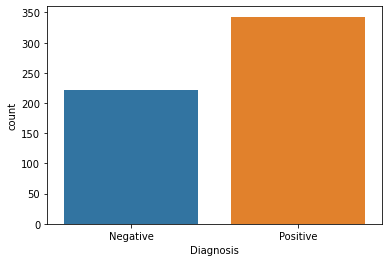

Negative samples account for 39.29% of the data.
Positive samples account for 60.71% of the data.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.countplot(x = 'Diagnosis', data = diag_state)
g.set(xticklabels=['Negative','Positive'])
plt.show()
idx_1 = (diag_state == 1).index[(diag_state == 1)['Diagnosis'] == True].tolist() # positive
idx_2 = (diag_state == 0).index[(diag_state == 0)['Diagnosis'] == True].tolist() # negative
print("Negative samples account for " + str("{0:.2f}".format(100 * len(idx_2) / len(diag_state))) + "% of the data.")
print("Positive samples account for " + str("{0:.2f}".format(100 * len(idx_1) / len(diag_state))) + "% of the data.")

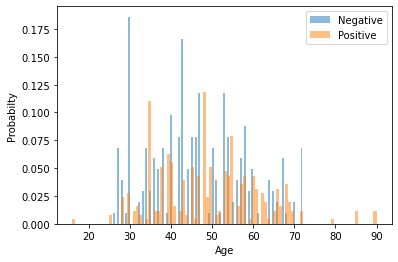

In [5]:
bins = 100
feat = 'Age'
plt.hist(dataset[feat].loc[idx_2], bins, density=True, alpha=0.5, label='Negative')
plt.hist(dataset[feat].loc[idx_1], bins, density=True, alpha=0.5, label='Positive')
plt.xlabel('Age')
plt.ylabel('Probabilty')
plt.legend(loc='upper right')
plt.show()

C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

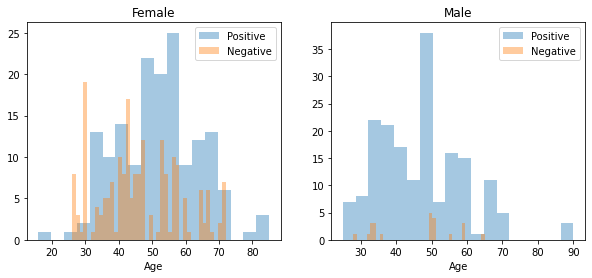

In [6]:
Positive = 'Positive'
Negative = 'Negative'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Gender']==1]
men = data[data['Gender']==0]
ax = sns.distplot(women[women['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Diagnosis']==1].Age.dropna(), bins=18, label = Positive, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Diagnosis']==0].Age.dropna(), bins=40, label = Negative, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

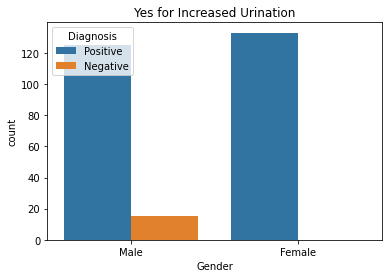

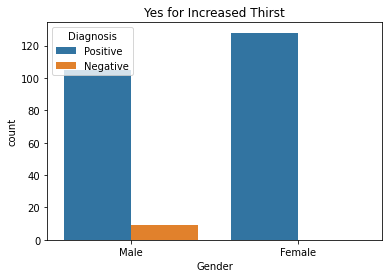

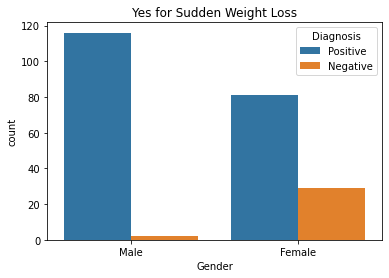

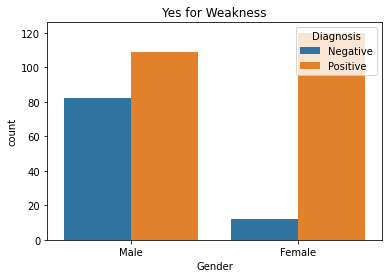

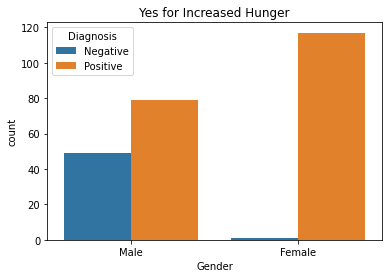

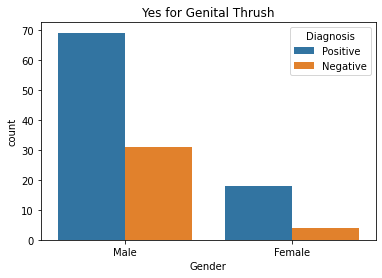

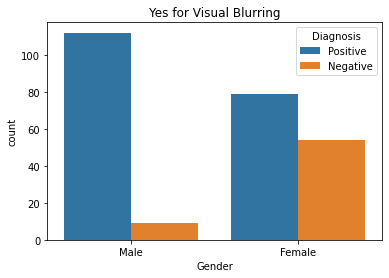

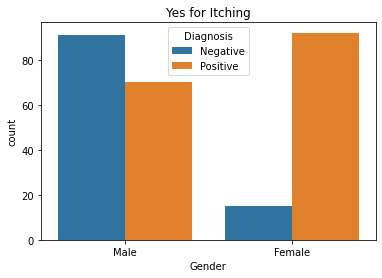

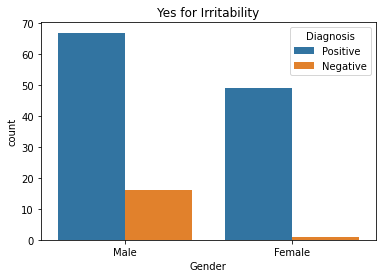

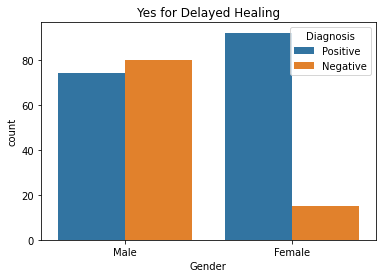

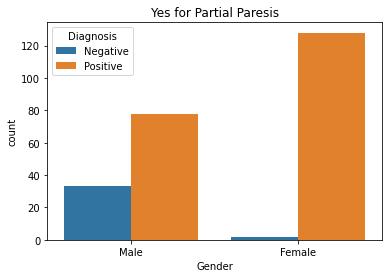

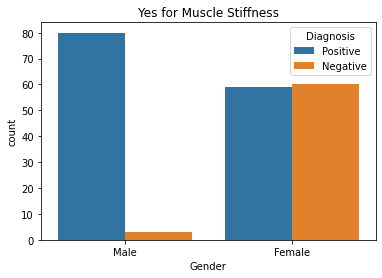

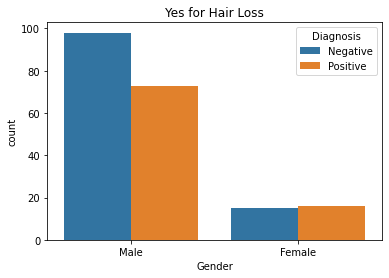

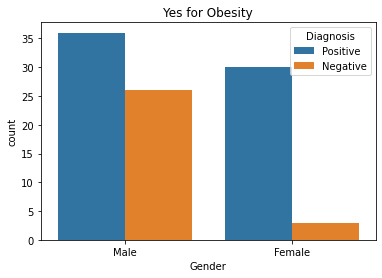

In [7]:
for i in dataset.keys():
    if i == 'Age' or i == 'Gender' or i =='Diagnosis' or i == 'Family History': 
        continue
    g = sns.countplot(x = 'Gender', hue= 'Diagnosis', data = dataset[dataset[i] == 'Yes'])
    g.set(xticklabels=['Male','Female'])
    plt.title('Yes for {}'. format(i))
    plt.show()

C:\Users\Valeriia Kravchik\anaconda3\envs\bm-336546-hw2\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


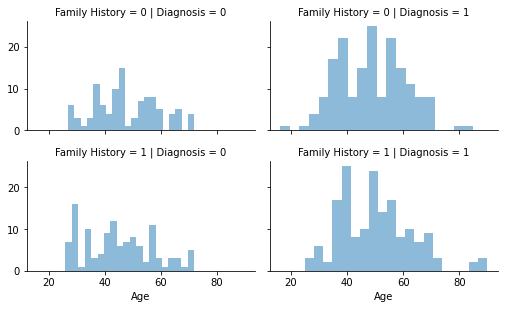

In [8]:
grid = sns.FacetGrid(data, col='Diagnosis', row='Family History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

orig_feat = data.columns.values.tolist()
orig_feat.remove('Diagnosis')
X_train, X_test, y_train, y_test = train_test_split(data, np.ravel(diag_state), test_size=0.2, random_state=10, stratify=np.ravel(diag_state))
                                              

In [10]:
def find_distribution(X,features):
    count = 0
    feat = features.copy()
    feat.pop(0) #drop age
    feat.pop(15) #drop diagnosis
    percent = np.zeros(len(feat))
    for i in range(len(feat)):
        for j in X['Diagnosis'].index.values:
            if X[feat[i]][j] == 1:
                count += 1
                percent[i] = count/len(X[feat[i]])
        count = 0
    return percent*100,feat

In [11]:
percent_train,feat = find_distribution(X_train,features)
percent_test,_ = find_distribution(X_test,features)
delta = -(percent_test-percent_train)
a = np.array([percent_train,percent_test,delta]).T

distribution = pd.DataFrame(a,columns = ['Train%','Test%','Delta%'], index = feat )
distribution.head(16)

,Train%,Test%,Delta%
Gender,62.610619,68.141593,-5.530973
Increased Urination,48.451327,47.787611,0.663717
Increased Thirst,46.017699,47.787611,-1.769912
Sudden Weight Loss,41.371681,44.247788,-2.876106
Weakness,55.752212,62.831858,-7.079646
Increased Hunger,45.796460,46.017699,-0.221239
Genital Thrush,22.787611,29.203540,-6.415929
Visual Blurring,44.247788,47.787611,-3.539823
Itching,48.893805,51.327434,-2.433628
Irritability,22.566372,27.433628,-4.867257


In [12]:
# Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object 
# filter categorical columns using mask and turn it into a list
categorical_cols = dataset.dropna().columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
d = dataset.dropna().copy()
# apply le on categorical feature columns
d[categorical_cols] = d[categorical_cols].apply(lambda col: le.fit_transform(col.astype(str)))

d

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,42,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,45,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0
3,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,40,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,62,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0
519,35,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0
562,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0


In [13]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder( sparse=False ) 
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(d.drop('Age', axis=1)) # It returns an numpy array

In [14]:
dd = dataset.dropna()['Age'].values
dd = np.reshape(dd,(1, dd.size))
X_ohe = np.concatenate((dd.T,X_ohe), axis = 1)

In [15]:
X = np.delete(X_ohe.T,32,0)

In [17]:
X1 = np.delete(X,31,0).T

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X1, d["Diagnosis"], test_size=0.2, random_state=10, stratify =d["Diagnosis"] )
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty='l2', max_iter=10000)
logreg.fit(X_train,y_train)
y_pred_log = logreg.predict(X_test)
w_log = logreg.coef_

print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_log))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_log, average='macro'))) + "%")                                                    

Accuracy is: 89.52%
F1 score is: 89.13%


In [21]:
def cv_kfold_logreg(X, y, C, penalty, K, flag = 'logreg'):
    """
    
    :param X: Training set samples
    :param y: Training set labels 
    :param C: A list of regularization parameters
    :param penalty: A list of types of norm
    :param K: Number of folds
    :param mode: Mode of normalization (parameter of norm_standard function in clean_data module)
    :return: A dictionary as explained in the notebook
    """
    kf = SKFold(n_splits=K)
    validation_dict = []

    f = {}
    for c in C:
        for p in penalty:
            if flag =='logreg':
                clf = LogisticRegression(solver='saga', penalty=p, C=c, max_iter=10000, multi_class='ovr')
            if flag =='linear_svm':
                clf = svm.SVC(C=c,kernel='linear', max_iter=-1,probability=True,gamma=1/c)
            if flag =='nonlinear_svm1':
                clf = svm.SVC(C=c,kernel='poly', max_iter=-1,probability = True,gamma = 1/c)
            if flag == 'nonlinear_svm2':
                clf = svm.SVC(C=c,kernel='rbf', max_iter=-1,probability = True,gamma = 1/c)
            loss_val_vec = np.zeros(K)
            k = 0
            for train_idx, val_idx in kf.split(X, y):
                x_train, x_val = X[train_idx], X[val_idx]
                y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
               
                clf.fit(x_train,y_train)
                v = clf.predict_proba(x_val)
                loss_val_vec[k] = log_loss(y_val, v)
                k += 1
            mu = loss_val_vec.mean()

            std = loss_val_vec.std()

            validation_dict.append({'mu': mu, 'sigma': std, 'C': c, 'penalty': p})

    return validation_dict

In [23]:
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.metrics import log_loss
from sklearn import svm
C = [0.001, 0.01, 0.1, 1, 10, 100]
val_dict = cv_kfold_logreg(X_train,y_train,C=C,penalty=['l1','l2'],K=5,flag='logreg')

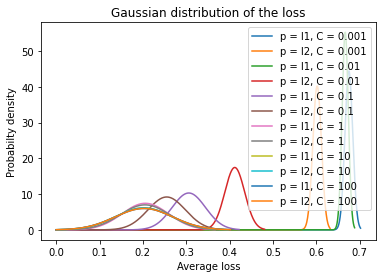

In [24]:
import scipy.stats as stats
for d in val_dict:
    x = np.linspace(0, d['mu'] + 3 * d['sigma'], 1000)
    plt.plot(x,stats.norm.pdf(x, d['mu'], d['sigma']), label="p = " + d['penalty'] + ", C = " + str(d['C'])) 
    plt.title('Gaussian distribution of the loss')
    plt.xlabel('Average loss')
    plt.ylabel('Probabilty density')
plt.legend()
plt.show()

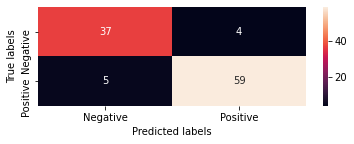

Accuracy is: 91.43%
F1 score is: 91.04%


In [25]:
C =  100 # complete this part according to your best result
penalty =  'l1'# complete this part according to your best result
logreg = LogisticRegression(solver='saga', multi_class='ovr', penalty=penalty, C=C, max_iter=10000)
logreg.fit(X_train,y_train)
y_pred =  logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

In [26]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]
y_pred_test = logreg.predict(X_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = logreg.predict_proba(X_test)
#--------------------------Impelment your code here:-------------------------------------
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss = log_loss(y_test, y_pred_proba_test)
print('Loss is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(loss,Acc,F1))
#------------------------------------------------------------------------------------------
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

Loss is 0.25. 
Accuracy is 0.91. 
F1 is 0.93. 
AUROC is 0.962


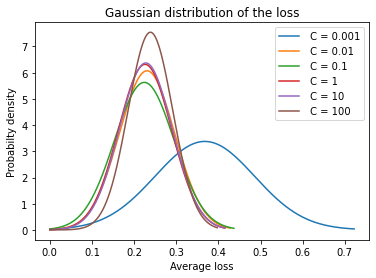

In [27]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
val_dict = cv_kfold_logreg(X_train,y_train,C=C,penalty=['-'],K=5,flag='linear_svm')
import scipy.stats as stats
for d in val_dict:
    x = np.linspace(0, d['mu'] + 3 * d['sigma'], 1000)
    plt.plot(x,stats.norm.pdf(x, d['mu'], d['sigma']), label=" C = " + str(d['C'])) 
    plt.title('Gaussian distribution of the loss')
    plt.xlabel('Average loss')
    plt.ylabel('Probabilty density')
plt.legend()
plt.show()

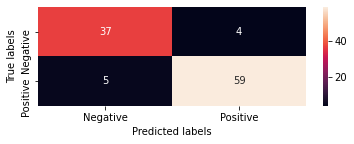

Accuracy is: 91.43%
F1 score is: 91.04%


In [28]:
C =  100 # complete this part according to your best result
# penalty =  'l1'# complete this part according to your best result
clf = svm.SVC(C=C,kernel='linear', max_iter=-1, probability = True, gamma=1e-4)
clf.fit(X_train,y_train)
y_pred =  clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

In [29]:
y_pred_test = clf.predict(X_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = clf.predict_proba(X_test)
#--------------------------Impelment your code here:-------------------------------------
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss = log_loss(y_test, y_pred_proba_test)
print('Loss is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(loss,Acc,F1))
#------------------------------------------------------------------------------------------
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

Loss is 0.24. 
Accuracy is 0.91. 
F1 is 0.93. 
AUROC is 0.957


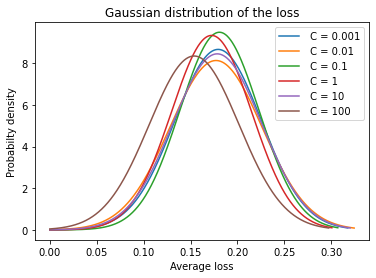

In [30]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
val_dict = cv_kfold_logreg(X_train,y_train,C=C,penalty=['-'],K=5,flag='nonlinear_svm1')
import scipy.stats as stats
for d in val_dict:
    x = np.linspace(0, d['mu'] + 3 * d['sigma'], 1000)
    plt.plot(x,stats.norm.pdf(x, d['mu'], d['sigma']), label=" C = " + str(d['C'])) 
    plt.title('Gaussian distribution of the loss')
    plt.xlabel('Average loss')
    plt.ylabel('Probabilty density')
plt.legend()
plt.show()

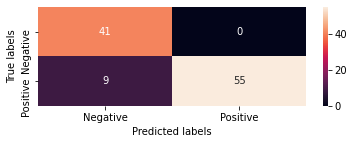

Accuracy is: 91.43%
F1 score is: 91.27%


In [31]:
C =  100 # complete this part according to your best result
# penalty =  'l1'# complete this part according to your best result
logreg = svm.SVC(C=C,kernel='poly', max_iter=-1, probability = True, gamma = 1/C)
logreg.fit(X_train,y_train)
y_pred =  logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

In [32]:
y_pred_test = logreg.predict(X_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = logreg.predict_proba(X_test)
#--------------------------Impelment your code here:-------------------------------------
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss = log_loss(y_test, y_pred_proba_test)
print('Loss is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(loss,Acc,F1))
#------------------------------------------------------------------------------------------
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

Loss is 0.30. 
Accuracy is 0.91. 
F1 is 0.92. 
AUROC is 0.952


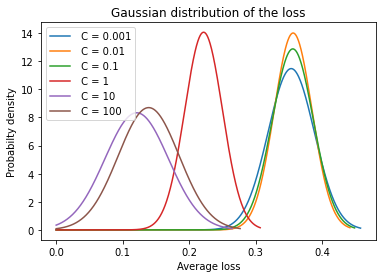

In [33]:
C = [0.001, 0.01, 0.1, 1, 10, 100]
val_dict = cv_kfold_logreg(X_train,y_train,C=C,penalty=['-'],K=5,flag='nonlinear_svm2')
import scipy.stats as stats
for d in val_dict:
    x = np.linspace(0, d['mu'] + 3 * d['sigma'], 1000)
    plt.plot(x,stats.norm.pdf(x, d['mu'], d['sigma']), label=" C = " + str(d['C'])) 
    plt.title('Gaussian distribution of the loss')
    plt.xlabel('Average loss')
    plt.ylabel('Probabilty density')
plt.legend()
plt.show()

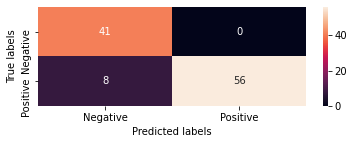

Accuracy is: 92.38%
F1 score is: 92.22%


In [34]:
C =  10 # complete this part according to your best result
# penalty =  'l1'# complete this part according to your best result
logreg = svm.SVC(C=C,kernel='rbf', max_iter=-1, probability = True, gamma = 1/C)
logreg.fit(X_train,y_train)
y_pred =  logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax1 = plt.subplot(211)
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
ax1.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

In [35]:
y_pred_test = logreg.predict(X_test) #NOTICE NOT TO USE THE STANDARDIZED DATA.
y_pred_proba_test = logreg.predict_proba(X_test)
#--------------------------Impelment your code here:-------------------------------------
TN = calc_TN(y_test, y_pred_test)
FP = calc_FP(y_test, y_pred_test)
FN = calc_FN(y_test, y_pred_test)
TP = calc_TP(y_test, y_pred_test)
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
Acc = (TP+TN)/(TP+TN+FP+FN)
F1 = (2*Se*PPV)/(Se+PPV)
loss = log_loss(y_test, y_pred_proba_test)
print('Loss is {:.2f}. \nAccuracy is {:.2f}. \nF1 is {:.2f}. '.format(loss,Acc,F1))
#------------------------------------------------------------------------------------------
print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

Loss is 0.16. 
Accuracy is 0.92. 
F1 is 0.93. 
AUROC is 0.994


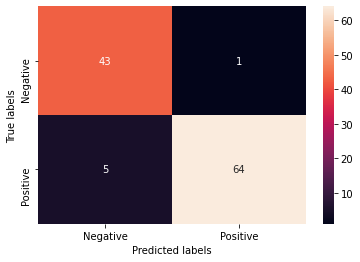

Accuracy is: 94.69%
F1 score is: 94.50%


In [36]:
from sklearn.ensemble import RandomForestClassifier as rfc
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Diagnosis'],axis=1), np.ravel(diag_state), test_size=0.2, random_state=10, stratify = np.ravel(diag_state) )

# mode = 'standard' # choose your method
clf = rfc(n_estimators=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

[(0.2219, 'Increased Urination'), (0.1792, 'Increased Thirst'), (0.1355, 'Age'), (0.097, 'Gender'), (0.0497, 'Partial Paresis'), (0.0486, 'Irritability'), (0.0476, 'Hair Loss'), (0.034, 'Visual Blurring'), (0.0315, 'Itching'), (0.0288, 'Increased Hunger'), (0.0279, 'Delayed Healing'), (0.0235, 'Sudden Weight Loss'), (0.0175, 'Obesity'), (0.0171, 'Genital Thrush'), (0.0167, 'Weakness'), (0.0127, 'Muscle Stiffness'), (0.011, 'Family History')]
[ 2  3  0  1 12 10 14  8  9  6 11  4 15  7  5 13 16]
1. feature 2 (0.221862)
2. feature 3 (0.179160)
3. feature 0 (0.135492)
4. feature 1 (0.096953)
5. feature 12 (0.049658)
6. feature 10 (0.048595)
7. feature 14 (0.047562)
8. feature 8 (0.033973)
9. feature 9 (0.031539)
10. feature 6 (0.028781)
11. feature 11 (0.027885)
12. feature 4 (0.023512)
13. feature 15 (0.017543)
14. feature 7 (0.017079)
15. feature 5 (0.016660)
16. feature 13 (0.012703)
17. feature 16 (0.011040)


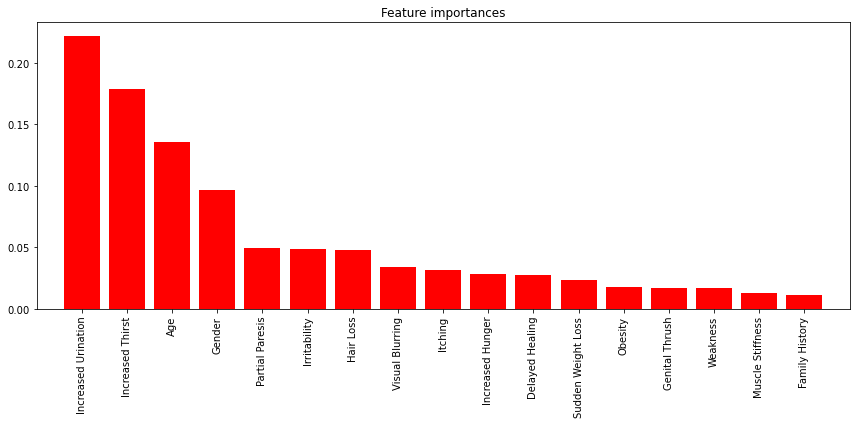

In [74]:
print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), orig_feat), 
             reverse=True))
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
o = np.zeros(len(orig_feat)).tolist()
for i,val in enumerate(indices):
    o[i] = orig_feat[val]
plt.xticks(range(X_train.shape[1]), o)
plt.xlim([-1, X_train.shape[1]])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

(565, 2)

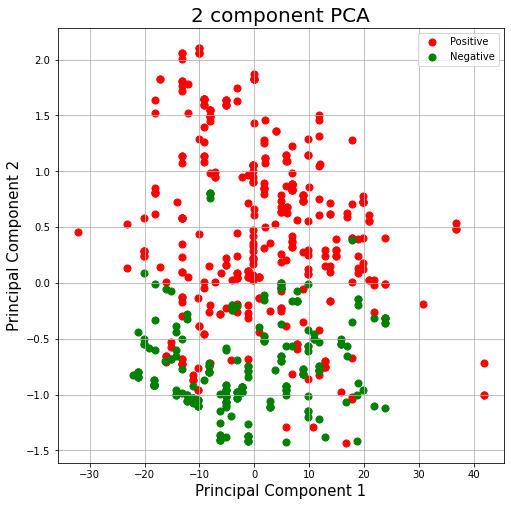

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.drop(['Diagnosis'],axis=1))
transform_data = pca.transform(data.drop(['Diagnosis'],axis=1))
principalComponents = pca.fit_transform(data.drop(['Diagnosis'],axis=1))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data[['Diagnosis']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(['Positive','Negative'])
ax.grid()
principalComponents.shape

In [101]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, np.ravel(diag_state), test_size=0.2, random_state=10, stratify = np.ravel(diag_state) )


Theory Questions 

Q1: If we have unbalanced data we can get high accuracy but the other performances will be bad. For example if we have 3% pathology data samples and the classifier always returns healthy label we will get high accuracy (97%) but sensitivity, for example, will be low. 

Q2: If we chose just 2 features we have 2 options:
1) we choose the most correlated features and other not usefull for our classification we will get good performance for predicted labels, and it will be easy for computation

2) if we chose features with bad correlation (it means not usefull for classification) we will get a bad prediction results. But computation will be fast.

If we chose all the features, we have extra information that is not useful for us and make computetions slower, require a large amount of system memory and will affect the performance. 

Q3: we will prfer SVM non-linear, because if we can not distinguish the difference between pancreas biopsies from the human eye the data is not separable linearly. So we do not want to use Logistiq regression and SVM with linear kernel, due to their similarity.

Q4: SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables. The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting. SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.